In [15]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path

In [16]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600
# carbon_per_req = self.energy_per_lvl[co2opt_lvl] * ci + self.embodied_carbon_per_sec * self.time_per_lvl[co2opt_lvl]

# Resolution

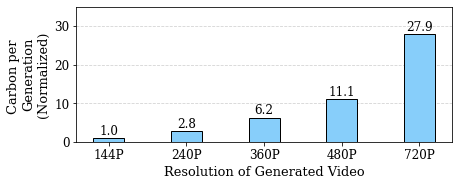

In [17]:
steps = 100
frames = 16
batch = 1

resolutions = {"144P": (144, 256), 
               "240P": (240, 426), 
               "360P": (360, 640),
               "480P": (480, 854),
               "720P": (720, 1280),}

y = []
for k, v in resolutions.items():
    with open(f"../data/char_sample_1/batch_{batch}_steps_{steps}_frames_{frames}_reso_{v[0]}x{v[1]}.json") as f:
        data = json.load(f)
    total_co2 = np.mean(data["co2"])  * 1.2 + embodied_carbon_per_sec * np.mean(data["time"])
    y.append(total_co2)

# normalize y to y[0]
y = np.array(y) / y[0]

fig, axs = plt.subplots(nrows=1, ncols=1, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.95, 'right':0.995, 'left':0.25}, figsize=(7,2.5))
bars = axs.bar(list(resolutions.keys()), y, width=0.4, zorder=3, edgecolor='black', color="lightskyblue")
# show values on top of bars
for bar in bars:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{round(yval, 1)}", ha='center', va='bottom', fontsize=12)
axs.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
axs.set_ylim(0, 35)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylabel("Carbon per \nGeneration\n(Normalized)", fontsize=13)
axs.set_xlabel("Resolution of Generated Video", fontsize=13)
plt.savefig(f"figures/fig1_resolution.pdf", bbox_inches='tight')

# Number of frames 16 - 48

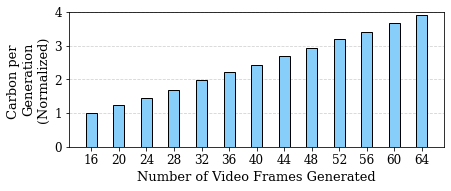

In [18]:
resolution = (240, 426)
frames = np.arange(16, 65, 4)
frames = [str(k) for k in frames]
batch = 1
steps = 100

y = []
for frame in frames:
    with open(f"../data/char_sample_1/batch_{batch}_steps_{steps}_frames_{frame}_reso_{resolution[0]}x{resolution[1]}.json") as f:
        data = json.load(f)
    total_co2 = np.mean(data["co2"])  * 1.2 + embodied_carbon_per_sec * np.mean(data["time"])
    y.append(total_co2)

# normalize y to y[0]
y = np.array(y) / y[0]

fig, axs = plt.subplots(nrows=1, ncols=1, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.95, 'right':0.995, 'left':0.25}, figsize=(7,2.5))
bars = axs.bar(frames, y, width=0.4, zorder=3, edgecolor='black', color="lightskyblue")
# show values on top of bars
# for bar in bars:
#     yval = bar.get_height()
#     axs.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{round(yval, 1)}", ha='center', va='bottom', fontsize=12)
axs.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
axs.set_ylim(0, 4)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylabel("Carbon per \nGeneration\n(Normalized)", fontsize=13)
axs.set_xlabel("Number of Video Frames Generated", fontsize=13)
plt.savefig(f"figures/fig2_frames.pdf", bbox_inches='tight')


# Batch Size 1, 2, 4, 8, 16

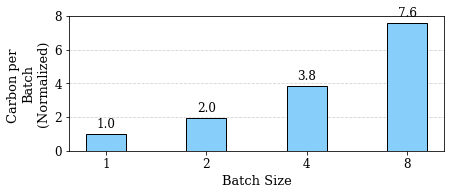

In [19]:
resolution = (240, 426)
steps = 100
frames = 16
batches = 1, 2, 4, 8
batches = [str(k) for k in batches]
y = []
for batch in batches:
    with open(f"../data/char_sample_1/batch_{batch}_steps_{steps}_frames_{frames}_reso_{resolution[0]}x{resolution[1]}.json") as f:
        data = json.load(f)
    total_co2 = np.mean(data["co2"])  * 1.2 + embodied_carbon_per_sec * np.mean(data["time"])
    y.append(total_co2)

# normalize y to y[0]
y = np.array(y) / y[0]

fig, axs = plt.subplots(nrows=1, ncols=1, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.95, 'right':0.995, 'left':0.25}, figsize=(7,2.5))
bars = axs.bar(batches, y, width=0.4, zorder=3, edgecolor='black', color="lightskyblue")
# show values on top of bars
for bar in bars:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{round(yval, 1)}", ha='center', va='bottom', fontsize=12)
axs.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
axs.set_ylim(0, 8)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylabel("Carbon per \nBatch\n(Normalized)", fontsize=13)
axs.set_xlabel("Batch Size", fontsize=13)
plt.savefig(f"figures/fig3_batch.pdf", bbox_inches='tight')

# Number of Steps 60, 70, 80, ..., 140

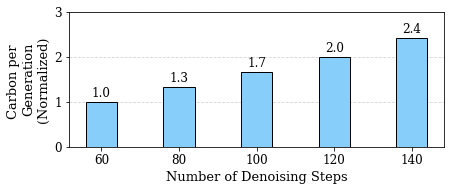

In [20]:
resolution = (240, 426)
steps = 60, 80, 100, 120, 140
frames = 16
batches = 1
steps = [str(k) for k in steps]
y = []
for step in steps:
    with open(f"../data/char_sample_1/batch_{batches}_steps_{step}_frames_{frames}_reso_{resolution[0]}x{resolution[1]}.json") as f:
        data = json.load(f)
    total_co2 = np.mean(data["co2"])  * 1.2 + embodied_carbon_per_sec * np.mean(data["time"])
    y.append(total_co2)

# normalize y to y[0]
y = np.array(y) / y[0]

fig, axs = plt.subplots(nrows=1, ncols=1, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.95, 'right':0.995, 'left':0.25}, figsize=(7,2.5))
bars = axs.bar(steps, y, width=0.4, zorder=3, edgecolor='black', color="lightskyblue")
# show values on top of bars
for bar in bars:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{round(yval, 1)}", ha='center', va='bottom', fontsize=12)
axs.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
axs.set_ylim(0, 3)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylabel("Carbon per \nGeneration\n(Normalized)", fontsize=13)
axs.set_xlabel("Number of Denoising Steps", fontsize=13)
plt.savefig(f"figures/fig4_sampling.pdf", bbox_inches='tight')